In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandasql as psql
from pandasql import sqldf
import sqlite3
from scipy.stats import pearsonr, norm
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
bom_gross_data = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
bom_gross_data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [24]:
# Connect to the SQLite database
conn = sqlite3.connect('./zippedData/im.db/im.db')

# Load tables into DataFrames
movie_basics_df = pd.read_sql_query("SELECT * FROM movie_basics;", conn)
directors_df = pd.read_sql_query("SELECT * FROM directors;", conn)
known_for_df = pd.read_sql_query("SELECT * FROM known_for;", conn)
movie_akas_df = pd.read_sql_query("SELECT * FROM movie_akas;", conn)
movie_ratings_df = pd.read_sql_query("SELECT * FROM movie_ratings;", conn)
persons_df = pd.read_sql_query("SELECT * FROM persons;", conn)
principals_df = pd.read_sql_query("SELECT * FROM principals;", conn)
writers_df = pd.read_sql_query("SELECT * FROM writers;", conn)

# Close the connection
conn.close()


In [25]:
# lambda function to simplify SQL querying
pysqldf = lambda q: sqldf(q, globals())


In [26]:
#test query
query1 = """SELECT * FROM movie_basics_df
            WHERE start_year > 2015"""
result1 = pysqldf(query1)
# print(result1)
result1


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
1,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
2,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
4,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
61062,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
61063,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"
61064,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
61065,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama


In [27]:
movie_basics_df.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [28]:
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [29]:
print('Movie Basic DF')
print(movie_basics_df.describe)
print()
print('Box office gross dataframe')
print(bom_gross_data.describe)

Movie Basic DF
<bound method NDFrame.describe of          movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                       

In [30]:
#identify missing values in bom_gross_data
bom_gross_data.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [31]:
#identify missing values in movie_ratings_df
movie_ratings_df.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [32]:
#identify missing values in movie_basics_df
movie_basics_df.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [33]:
movie_basics_df = movie_basics_df.dropna()
movie_ratings_df = movie_ratings_df.dropna()
bom_gross_data = bom_gross_data.dropna()

In [34]:
#merge movie_ratings_df and movies_basics_df
merged_df = pd.merge(movie_basics_df, movie_ratings_df, on='movie_id')
merged_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...,...
65715,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
65716,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
65717,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
65718,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [35]:
summary_stats = merged_df.describe()
print(summary_stats)

         start_year  runtime_minutes  averagerating      numvotes
count  65720.000000     65720.000000   65720.000000  6.572000e+04
mean    2014.258065        94.732273       6.320902  3.954674e+03
std        2.600143       209.377017       1.458878  3.208823e+04
min     2010.000000         3.000000       1.000000  5.000000e+00
25%     2012.000000        81.000000       5.500000  1.600000e+01
50%     2014.000000        91.000000       6.500000  6.200000e+01
75%     2016.000000       104.000000       7.300000  3.520000e+02
max     2019.000000     51420.000000      10.000000  1.841066e+06


In [36]:
corr, _ = pearsonr(merged_df['runtime_minutes'], merged_df['averagerating'])
print(f'Correlation between runtime and average rating: {corr}')

Correlation between runtime and average rating: -0.0070758938508826115


In [37]:
threshold = 500
filtered_df = merged_df[merged_df['runtime_minutes'] <= threshold]

In [38]:
#descriptive statistics
avg_rating = np.mean(filtered_df['averagerating'])
median_runtime = np.median(filtered_df['runtime_minutes'])

In [39]:
avg_rating

6.3206528686653485

In [40]:
median_runtime

91.0

C:\Users\omend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


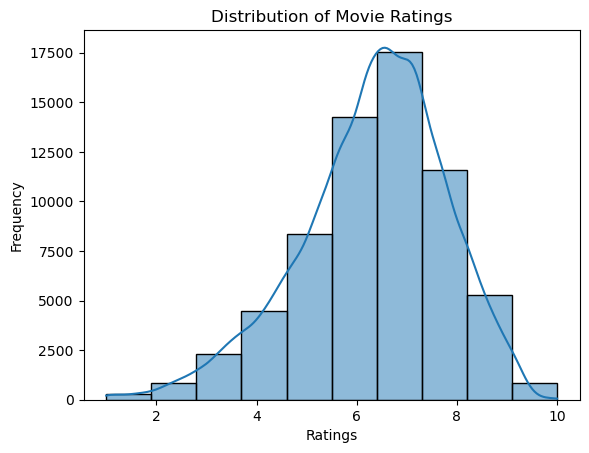

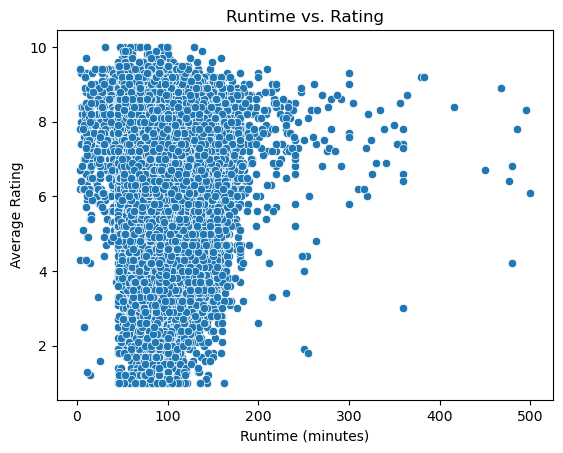

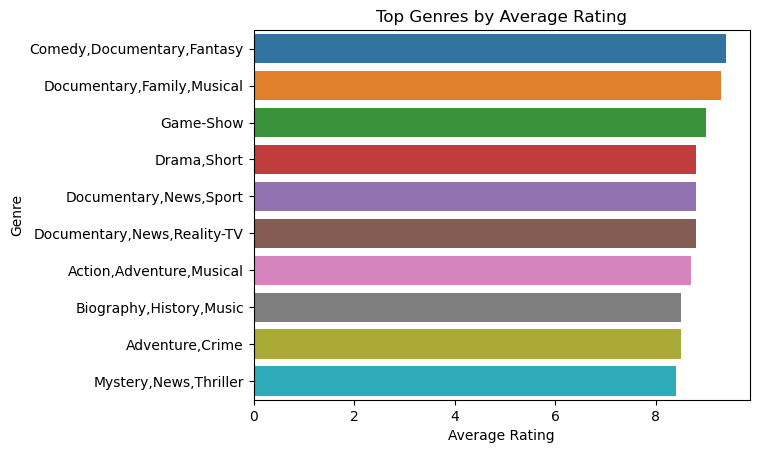

In [41]:
#Distribution of movie ratings
sns.histplot(merged_df['averagerating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

#Relationship between runtime and rating
sns.scatterplot(x='runtime_minutes', y='averagerating', data=filtered_df)
plt.title('Runtime vs. Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.show()

#Top genres by average rating
top_genres = merged_df.groupby('genres')['averagerating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

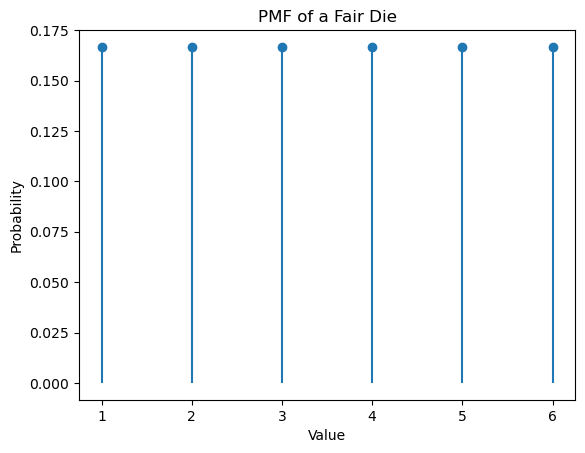

In [42]:
#Statistical Analysis PMF

x = np.arange(1,7)
pmf = np.ones_like(x) / len(x)

plt.stem(x, pmf, basefmt=" ")
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('PMF of a Fair Die')
plt.show()

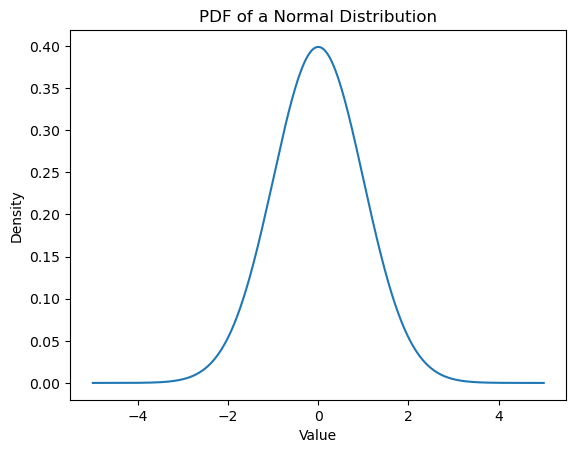

In [43]:
#PDF

x = np.linspace(-5, 5, 1000)
pdf = norm.pdf(x)

plt.plot(x,pdf)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('PDF of a Normal Distribution')
plt.show()

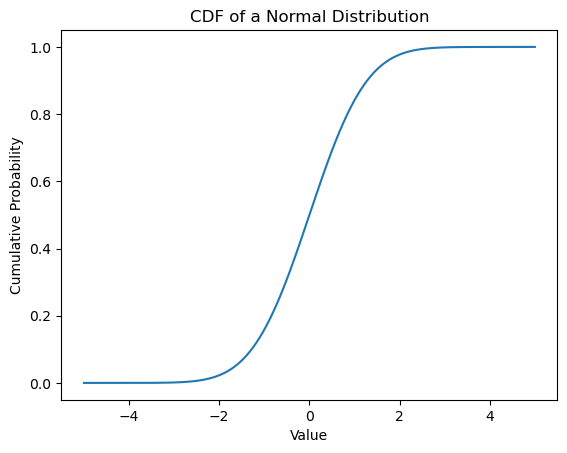

In [45]:
#Cumulative Distribution Function

cdf = norm.cdf(x)

plt.plot(x,cdf)
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('CDF of a Normal Distribution')
plt.show()